# Set carbon emission targets

In this notebook a target for the emission is set and the required tax rate is calculated. This involves inverting the model, and takes some time.  

The target growth of emission is the same for all country. 

In another notebook the target growth match a given reduction relative to "business as usual". That notebook can be accessed through the overview notebook. 

This notebook can be run by \<cell> \<Runn All> in the menu. 

This shows the raw Jupyuter notebook. The other notebooks are initialy displayed as slideshows. 

In [1]:
# Import modelflow

%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

from ipywidgets import interact,Dropdown,Checkbox
from IPython.display import display, clear_output,Latex, Markdown
import pandas as pd

import modelmf
import modeljupyter as mj
from modelvis import waterplot

from modelinvert import targets_instruments
from modelclass import model
model.widescreen()

model.scroll_off()

In [3]:
# Load model and data, and run 

masia,baseline = model.modelload('Asia_8nov.pcim',run=1,silent=1,ljit=0,stringjit=False)
from inject import inject
inject(masia)  
masia.lastdf = masia.basedf.copy()

# Parameters in this experiment


In [4]:
countries_of_interest = [country for country in masia.countries_ASEAN if country not in ['BRN','SGP']]
                         
instruments = [[f'{country}_GCARBR_A'] for country in countries_of_interest]
target_var  = [f'{country}_CO2' for country in countries_of_interest]
delay = 3
target_growth = 1.01

# The instrument variables

In [5]:
print(instruments)

[['KHM_GCARBR_A'], ['IDN_GCARBR_A'], ['LAO_GCARBR_A'], ['MYS_GCARBR_A'], ['MMR_GCARBR_A'], ['PHL_GCARBR_A'], ['THA_GCARBR_A'], ['VNM_GCARBR_A']]


# The target variables

In [6]:
print(target_var)

['KHM_CO2', 'IDN_CO2', 'LAO_CO2', 'MYS_CO2', 'MMR_CO2', 'PHL_CO2', 'THA_CO2', 'VNM_CO2']


# Emission in Business as usual scenario

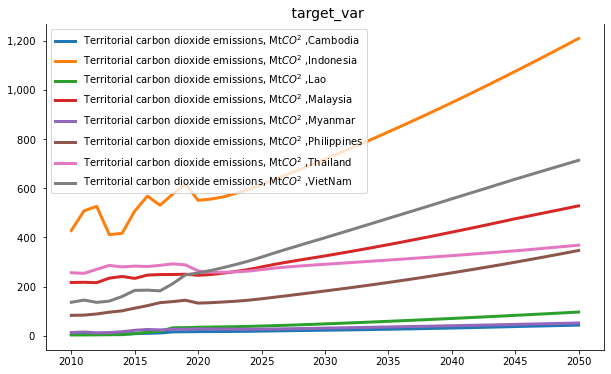

In [7]:
model.plot_basis('target_var',df = masia.basedf.loc[2010:,target_var].rename(columns=masia.var_description),legend=1);

# Carbon tax in Business as usual scenario

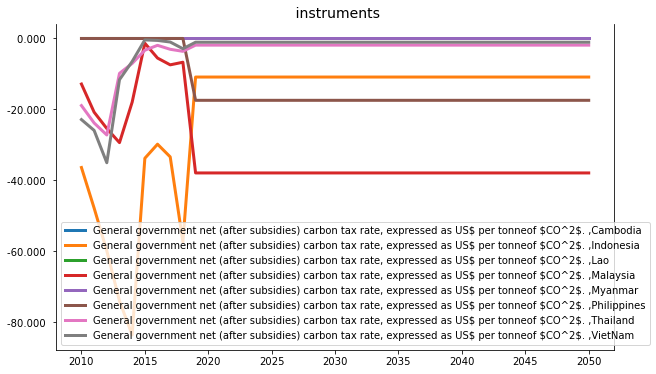

In [8]:
model.plot_basis('instruments',df = masia.basedf.loc[2010:,[i[0][:-2] for i in instruments]].rename(columns=masia.var_description),legend=1);

# Lets look at the impact of increasing the tax with 10 in 2022

In [9]:
experiment = baseline.copy()
experiment.loc[2022,instrumentlist]= experiment.loc[2022,(instrumentlist := [i[0] for i in instruments])] + 10 
result = masia(experiment,progressbar = 0,silent=1)

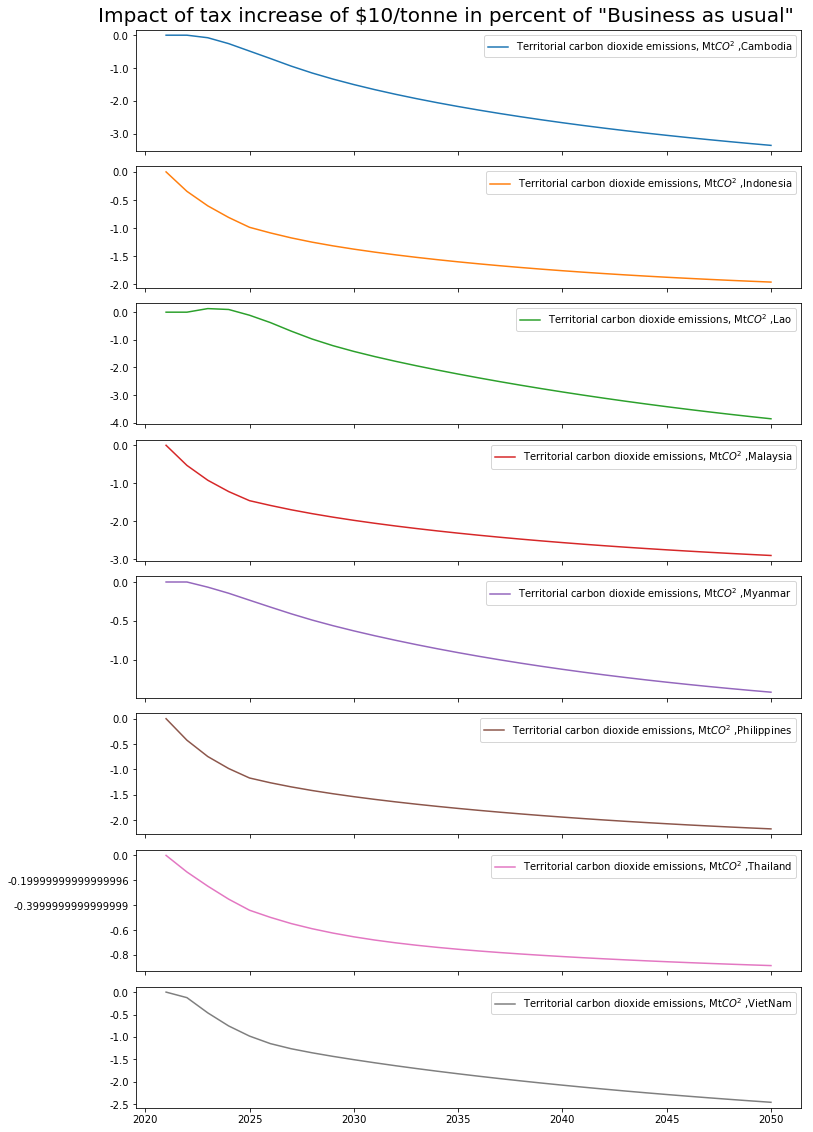

In [10]:
masia[target_var].difpctlevel.mul100.rename().plot(
    colrow  = 1,title = 'Impact of tax increase of \$10/tonne in percent of "Business as usual"  ',top=0.96,sharey=0,dec=2);
masia[target_var].dif.df;
    

# Define a dataframe with with target growth rates in $CO^2$

In [11]:
target_before = baseline[target_var].loc[2022+delay-1:,:]
calclines = '\n'.join(f'{t} = {t}(-1) * (1+{target_growth}/100)' for t in target_var)
target = target_before.mfcalc(calclines).loc[2022:,:]

# Show the target developement in emision 

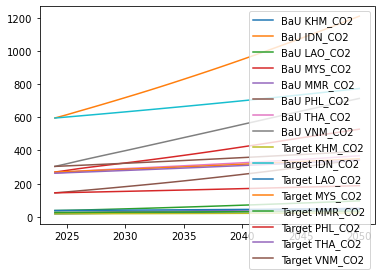

In [12]:
if 1:
    t = pd.concat([target_before.rename(columns={c: 'BaU '+c for c in target_before.columns}),
                   target.rename(columns={c: 'Target '+c for c in target_before.columns})],axis=1)
    t.plot()

# Setup the Target/instrument device

In [13]:
t_i_baseline = baseline.copy()
t_i = targets_instruments(databank=t_i_baseline,targets=target,instruments=instruments,
                          model=masia,DefaultImpuls=10,defaultconv=0.5,varimpulse=True,nonlin=4,silent=0)

# Run the device. 
And fetch a cup of coffee. 
Serious calculations are to be performed

In [14]:
t_i.debug=0
res = t_i(delay=delay,shortfall=0)

Update jacobi: 2024 effects from 2021


Finding instruments :   0%|          | 0/27

Period: 2024
Period: 2024  Target instrument iteration: 0  Max distance: 0.000
Period: 2025
Period: 2025  Target instrument iteration: 0  Max distance: 13.427
Period: 2025  Target instrument iteration: 1  Max distance: 1.834
Period: 2025  Target instrument iteration: 2  Max distance: 1.613
Period: 2025  Target instrument iteration: 3  Max distance: 2.183
>> Error in     : Asia_8Nov
>> In           : 2025
>> varposition   : 3950
>> Equation     : FRML <> LAO_HIC = LAO_HIC(-1)*EXP(LAO_HIC_A +  (0.5*((LOG(LAO_HIC(-1)))-(LOG(LAO_HIC(-2))))+0.1*((LOG(LAO_MTD))-(LOG(LAO_MTD(-1))))+0.4*(LAO_INFT/100)+0.375*(LAO_YER/LAO_YFT-LAO_YER(-1)/LAO_YFT(-1))+((LOG(1+LAO_ITAXR))-(LOG(1+LAO_ITAXR(-1))))+0.5*((LOG(1+(LAO_GCARBR*LAO_CO2*LAO_EXR/1000)/(0.6*LAO_YEN(-1))))-(LOG(1+(LAO_GCARBR(-1)*LAO_CO2(-1)*LAO_EXR(-1)/1000)/(0.6*LAO_YEN(-2)))))+0.01*(LAO_PREM-LAO_PREM(-1))/100) ) $
A snapshot of the data at the error point is at .errdump 
Also the .lastdf contains .errdump,  for inspecting 

Calculations of L

OverflowError: math range error

In [20]:
masia.smpl(2022,2022)
t_i.jaco

Endogeneous: MMR_PC: Domestic price of coal, inclusive of net carbon tax, US$ per Mn kJ ,Myanmar 
Formular: FRML <> MMR_PC = MMR_PC(-1)*WLD_PC/WLD_PC(-1)+(MMR_GCARBR*95.4481515280905/1000-MMR_GCARBR(-1)*95.4481515280905/1000)*(MMR_ENAB+MMR_AMB)/10 + MMR_PC_A $

MMR_PC    : Domestic price of coal, inclusive of net carbon tax, US$ per Mn kJ ,Myanmar
MMR_AMB   : Average score on ambition factors (index 0.5=5) ,Myanmar
MMR_ENAB  : Average score on enabling factors (index 0.5=5) ,Myanmar
MMR_GCARBR: General government net (after subsidies) carbon tax rate, expressed as US$ per tonneof $CO^2$. ,Myanmar
MMR_PC_A  : Add factor:Domestic price of coal, inclusive of net carbon tax, US$ per Mn kJ ,Myanmar
WLD_PC    : Domestic price of coal, inclusive of net carbon tax, US$ per Mn kJ ,World

Values : 
          2022
Base  5.184350
Last -4.592707
Diff -9.777057

Input last run: 
                         2022
MMR_AMB         1.333333e+00
MMR_ENAB        2.250000e+00
MMR_GCARBR     -2.858600e+02
MMR_G

In [22]:
masia.MMR_GCARBR

Endogeneous: MMR_GCARBR: General government net (after subsidies) carbon tax rate, expressed as US$ per tonneof $CO^2$. ,Myanmar 
Formular: FRML <> MMR_GCARBR = MMR_GCARBR(-1) + MMR_GCARBR_A $

MMR_GCARBR  : General government net (after subsidies) carbon tax rate, expressed as US$ per tonneof $CO^2$. ,Myanmar
MMR_GCARBR_A: Add factor:General government net (after subsidies) carbon tax rate, expressed as US$ per tonneof $CO^2$. ,Myanmar

Values : 
            2022
Base    0.000000
Last -285.860023
Diff -285.860023

Input last run: 
                       2022
MMR_GCARBR(-1)    0.000000
MMR_GCARBR_A   -285.860023

# The target is nearly meet. 
The delay causes a slight difference to the target

In [ ]:
with masia.set_smpl(2024,2050):

    masia['LAO_co2 idn_co2'].pct.mul100.rename().plot(
        title=f'Reaching emision target growth rate {target_growth:,.2f}',colrow=1,top=0.8,sharey=0);

# Emission and tax after inverting the model 

In [ ]:
with masia.set_smpl(2010,2050):
    for country in countries_of_interest:
        masia[f'{country}_co2' ].plot_alt(title=f'{masia.iso_dict[country]} ',top=0.88);        
        masia[f'{country}_GCARBR' ].plot_alt(title=f' ',top=0.90);